Реализовать оптимизацию методом градиентного спуска для x^2(np.sin(0,5_x)^2+1). Какие параметры шага и количества итераций оптимальны? При каких значениях шага оптимизиция не выходит из локальных минимумов? Подробные условия смотрите в .ipynb файле, приложенном к материалам.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

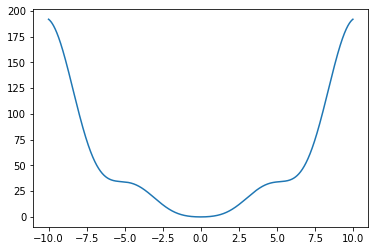

In [2]:
x = np.linspace(-10, 10, 5000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
def grad2(_x): return (2*_x*(np.sin(0.5*_x)**2+1))+(np.sin(0.5*_x)*np.cos(0.5*_x)*_x**2) 
plt.plot(x, func2(x))
plt.show()

In [18]:
x0=np.random.uniform(-2.5, 2.5)
print('true grad', grad2(x0))
print('method1', calculate_grad(func2, x0))
print('method2', calculate_grad2(func2, x0))

true grad -6.453404523093892
method1 -6.422104230379677
method2 -6.453424927987816


In [17]:
x0=np.random.uniform(-2.5, 2.5)
alpha=0.05
n_iter=100
for x in range(n_iter):
    print(x0, func2(x0))
    x0-=alpha*grad2(x0)

0.5220419553825195 0.29067777822569196
0.4629636250168071 0.2256165501253966
0.41183745685268797 0.17670090805717573
0.36723461296782883 0.13935728010729956
0.3280763604493792 0.11050448792940866
0.2935267558603785 0.08800046866043483
0.26292316311732555 0.07031641374906052
0.23572990013765713 0.05633698460707088
0.21150648943501915 0.04523343770317914
0.18988539359246623 0.036380504417694574
0.17055606488225222 0.029300406829068832
0.15325329081327838 0.023624206203201818
0.13774851982376007 0.01906452185925772
0.12384329101651885 0.015395892731836136
0.11136417363951538 0.012440391718316767
0.10015880646361805 0.010056924671773878
0.09009275019883534 0.008133162720567558
0.08104694945408975 0.006579388765481599
0.07291565807584179 0.0053237568688104964
0.06560472163808896 0.004308608900337226
0.0590301389994565 0.003487591963851767
0.05311684488339942 0.0028233888158878946
0.04779766984617803 0.0022859218633024107
0.043012444451609705 0.0018509259358876502
0.03870722212403853 0.00149

In [16]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0):
        for i in range(self.n_iter):
            x0-=self.alpha*grad(x0)
        return x0
opt2=optimizer(alpha, 100)
x=opt2.fit(func2, grad2, np.random.uniform(-2.5, 2.5))
print(x, func2(x))

-2.1868970231690016e-09 4.782518589945441e-18
